# Checkpoint 9 - Association


In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

* conda install -c conda-forge wordcloud

### Testing Section

In [2]:
#Create List
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

            ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

            ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

            ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

            ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
dataset

[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
 ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
 ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
 ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
 ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

### Transaction Encoder

In [3]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
d_f=pd.DataFrame(te_array, columns=te.columns_)  #Creating a new DataFrame from our Numpy array

d_f.head()

Dress  Earrings    Hat  Heels  Necklace  Pants  Sandals  Scarf  Shirt  \
0  False     False   True  False     False   True    False   True  False   
1  False     False   True  False     False   True    False  False  False   
2   True     False  False   True     False   True     True   True  False   
3   True      True   True   True      True  False    False   True  False   
4  False      True  False  False     False   True    False   True   True   

   Skirt  Sneakers  Sunglasses  
0   True      True       False  
1   True      True        True  
2  False     False       False  
3  False     False       False  
4   True     False       False

### Support With Itemlists

In [4]:
from mlxtend.frequent_patterns import apriori
apriori(d_f, min_support=0.5)

support itemsets
0      0.6      (2)
1      0.8      (5)
2      0.8      (7)
3      0.6      (9)
4      0.6   (5, 7)
5      0.6   (9, 5)

### Support With Column Names

In [5]:
frequent_itemsets=apriori(d_f, min_support=0.5, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

support        itemsets
0      0.6           (Hat)
1      0.8         (Pants)
2      0.8         (Scarf)
3      0.6         (Skirt)
4      0.6  (Pants, Scarf)
5      0.6  (Pants, Skirt)

### Confidence

In [6]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets, metric="confidence" , min_threshold=0.5) # associate itemsets with confidence over 50%.

antecedents consequents  antecedent support  consequent support  support  \
0     (Pants)     (Scarf)                 0.8                 0.8      0.6   
1     (Scarf)     (Pants)                 0.8                 0.8      0.6   
2     (Pants)     (Skirt)                 0.8                 0.6      0.6   
3     (Skirt)     (Pants)                 0.6                 0.8      0.6   

   confidence    lift  leverage  conviction  
0        0.75  0.9375     -0.04         0.8  
1        0.75  0.9375     -0.04         0.8  
2        0.75  1.2500      0.12         1.6  
3        1.00  1.2500      0.12         inf

### Lift

In [7]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.01)

antecedents consequents  antecedent support  consequent support  support  \
0     (Pants)     (Skirt)                 0.8                 0.6      0.6   
1     (Skirt)     (Pants)                 0.6                 0.8      0.6   

   confidence  lift  leverage  conviction  
0        0.75  1.25      0.12         1.6  
1        1.00  1.25      0.12         inf

- We got here two combinations with Lift Score greater than 1. So, we can conclude here that it's better to put Pants and Skirt together because it's likely to buy Pants and Skirt together rather than just buying Pants or Skirt only.

---

---

# Market Basket Optimisation 

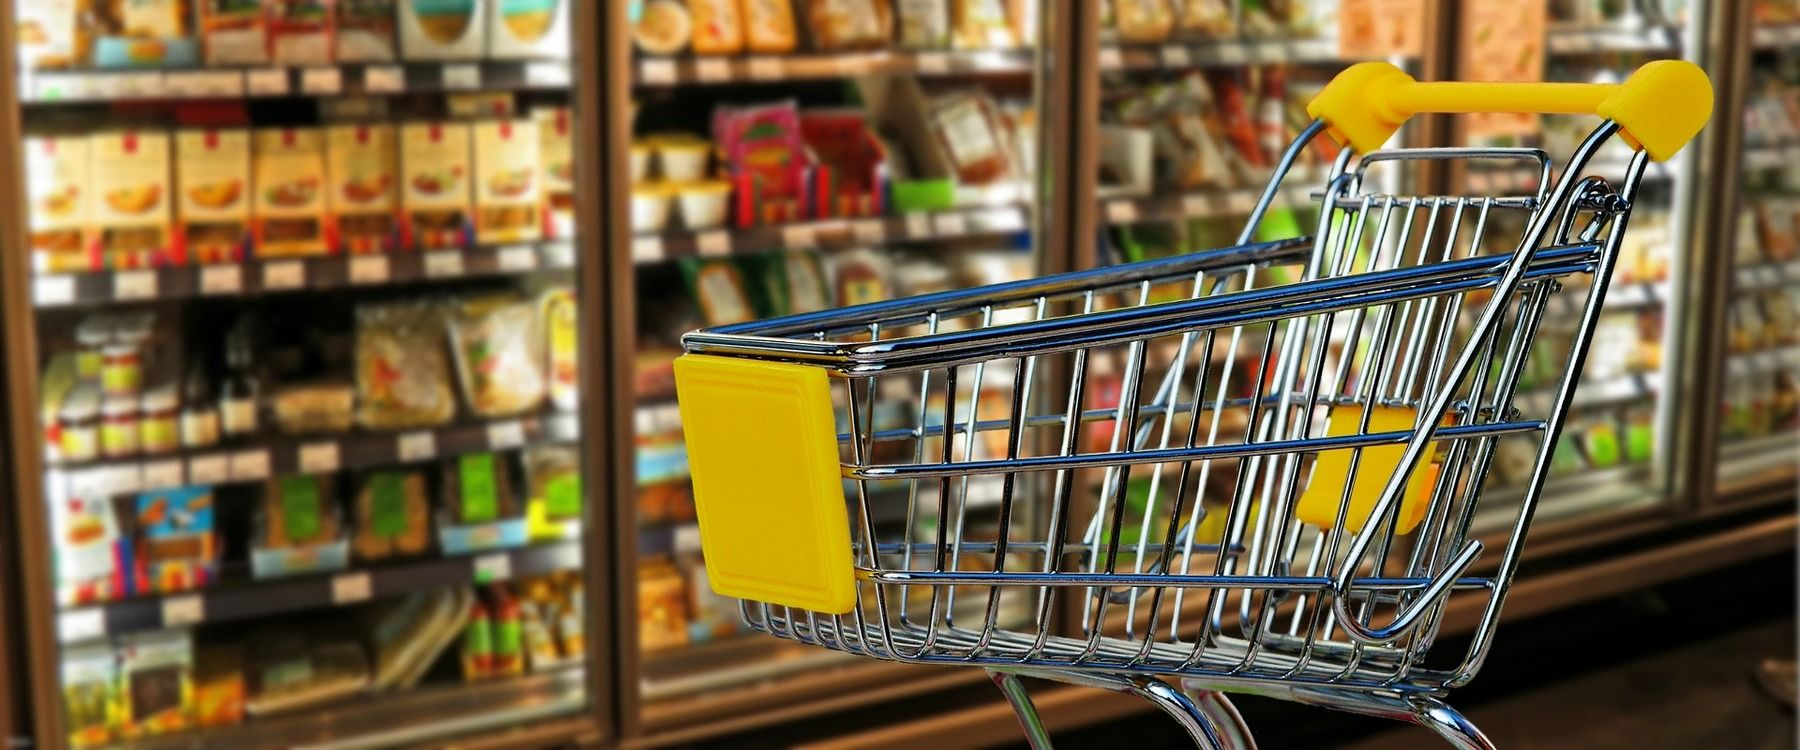

## Part A - Explore Data 

---

In [8]:
#Reading File
data_frame = pd.read_csv(r'Market_Basket_Optimisation.csv', header=None)

#Display data
data_frame.head()

0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  salad  mineral water  salmon   
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   
3             NaN        NaN    NaN    NaN            NaN     NaN   
4             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN  
3                NaN              NaN      NaN        NaN  
4                NaN              NaN      NaN        NaN

In [9]:
#Data Length
data_frame.shape

(7501, 20)

* We got here 7501 transactions

In [10]:
#Describe Dataset
data_frame.describe()

0              1              2              3          4   \
count            7501           5747           4389           3345       2529   
unique            115            117            115            114        110   
top     mineral water  mineral water  mineral water  mineral water  green tea   
freq              577            484            375            201        153   

                  5          6          7          8          9   \
count           1864       1369        981        654        395   
unique           106        102         98         88         80   
top     french fries  green tea  green tea  green tea  green tea   
freq             107         96         67         57         31   

                    10         11         12         13         14  \
count              256        154         87         47         25   
unique              66         50         43         28         19   
top     low fat yogurt  green tea  green tea  green tea  magazines   
freq                22         15          8          4          3   

                 15               16           17       18         19  
count             8                4            4        3          1  
unique            8                3            3        3          1  
top     protein bar  frozen smoothie  protein bar  spinach  olive oil  
freq              1                2            2        1          1

In [11]:
for i in range(0,19):
    print('Column ',i,' = ',data_frame[i].value_counts().size)



Column  0  =  115
Column  1  =  117
Column  2  =  115
Column  3  =  114
Column  4  =  110
Column  5  =  106
Column  6  =  102
Column  7  =  98
Column  8  =  88
Column  9  =  80
Column  10  =  66
Column  11  =  50
Column  12  =  43
Column  13  =  28
Column  14  =  19
Column  15  =  8
Column  16  =  3
Column  17  =  3
Column  18  =  3


* The Column '1' has the biggest number of items. So, we got at least 117 Items in our Data

---

## Part B - Visualizations Section 

---

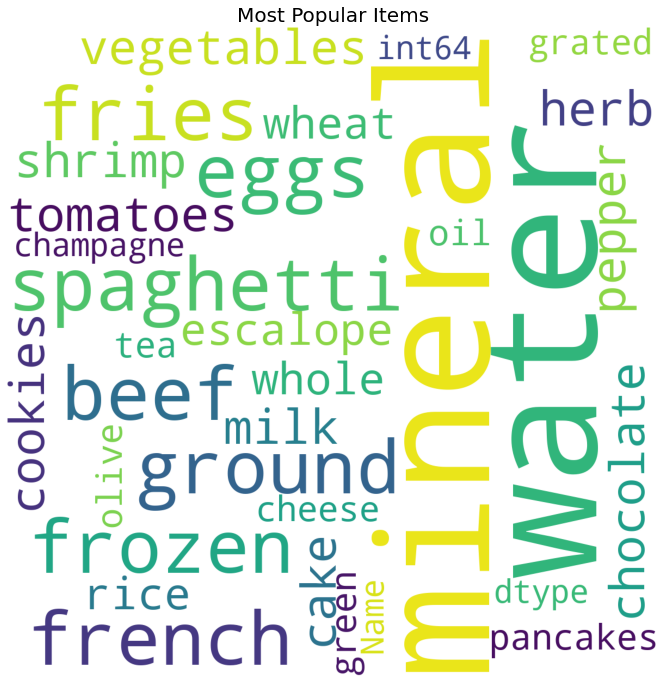

In [12]:
#Using WordCloud
plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'white',
                      width = 1200,
                      height = 1200,
                      max_words = 300).generate(str(data_frame[1].value_counts().head(20)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

---

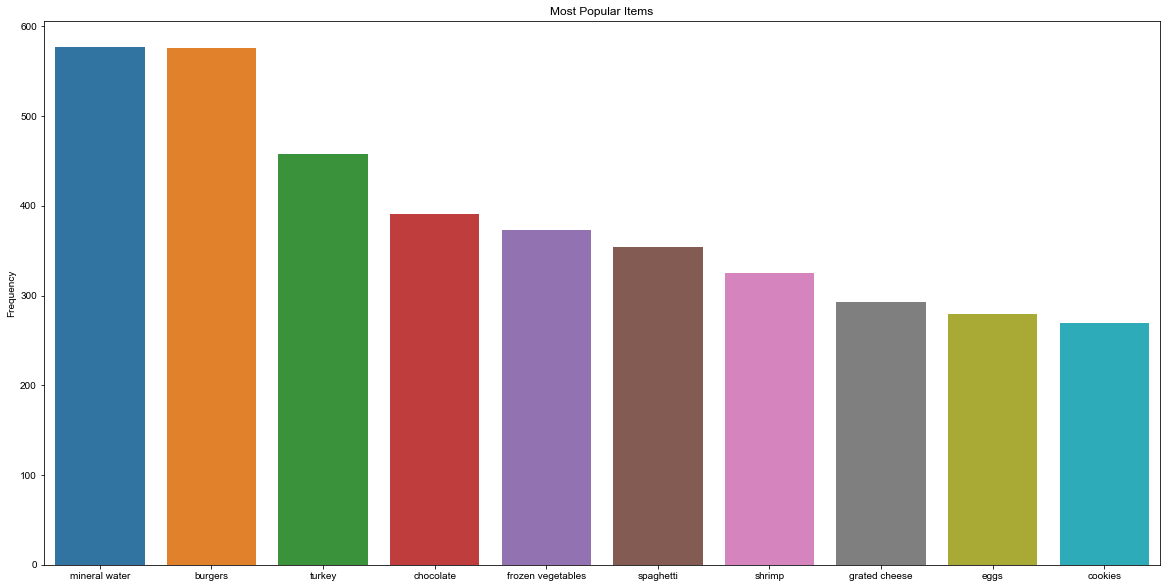

In [13]:
#Plotting Most frequency Items - Column 0

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame[0].value_counts().head(10).index, y=data_frame[0].value_counts().head(10))
plt.ylabel('Frequency')
plt.title('Most Popular Items')
sns.set(font_scale=1.3)
plt.show()

---

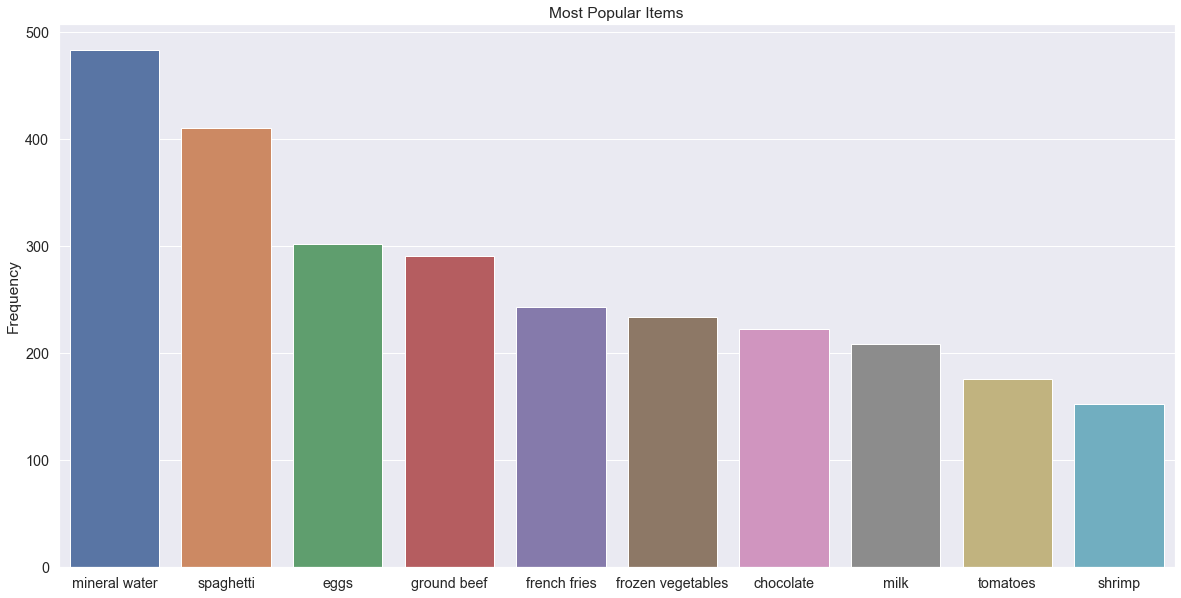

In [14]:
#Plotting Most frequency Items Column 1 

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame[1].value_counts().head(10).index, y=data_frame[1].value_counts().head(10))
plt.ylabel('Frequency')
plt.title('Most Popular Items')
sns.set(font_scale=1.3)
plt.show()

---

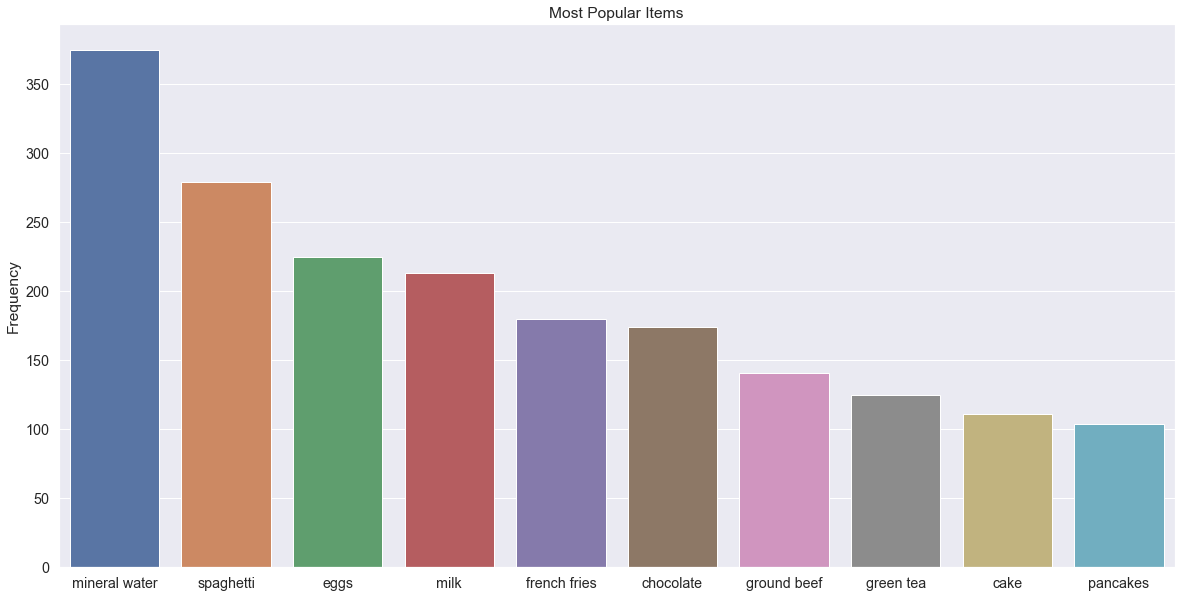

In [15]:
#Plotting Most frequency Items - Column 2

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(ax= ax, x = data_frame[2].value_counts().head(10).index, y=data_frame[2].value_counts().head(10))
plt.ylabel('Frequency')
plt.title('Most Popular Items')
sns.set(font_scale=1.3)
plt.show()

---

- We can conclude that the 'Mineral Water' is mostly the first item chosen by the purchaser

---

## Part C - Unsupervised Machine Learning - Association

### 1- Apriori Preparation

In [16]:
#preprocessing 

purchaser = []
for i in range(0, 7501):
    purchaser.append([str(data_frame.values[i,j]) for j in range(0, 20)])

purchaser = np.array(purchaser) # create numpy array
purchaser.shape # checking shape


(7501, 20)

In [17]:
#Using Transaction encoder

import mlxtend
from mlxtend.preprocessing import TransactionEncoder

trx_enc = TransactionEncoder()
te_array = trx_enc.fit(purchaser).transform(purchaser)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_array, columns=trx_enc.columns_)  #Creating a new DataFrame from our Numpy array

df.head()


asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour  whole wheat pasta  \
0        False       False              True              False   
1        False       False             False              False   
2        False       False             False              False   
3        False       False             False              False   
4        False       False             False              False   

   whole wheat rice   yams  yogurt cake  zucchini  
0             False   True        False     False  
1             False  False        False     False  
2             False  False        False     False  
3             False  False        False     False  
4              True  False        False     False  

[5 rows x 121 columns]

In [18]:
#Most 60 Chosen Items
data_frame[0].value_counts().head(60)

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
french fries         244
herb & pepper        232
ground beef          218
tomatoes             212
milk                 181
escalope             143
fresh tuna           129
red wine             123
ham                  120
cake                  98
green tea             97
whole wheat pasta     95
pancakes              80
soup                  78
muffins               69
olive oil             67
energy bar            67
champagne             64
pepper                61
avocado               57
butter                52
parmesan cheese       51
whole wheat rice      47
low fat yogurt        46
chicken               44
vegetables mix        39
pickles               38
meatballs             33
frozen smoothie       32
yogurt cake           31


---

- We will reduce the items to 60

---

In [19]:
new_data = data_frame[0].value_counts().head(60).index.tolist()
df = df.loc[:,new_data]
df.shape

(7501, 60)

### 2- Support with Itemsets

#### A- With Itemsets

In [20]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.01)

support     itemsets
0    0.238368          (0)
1    0.087188          (1)
2    0.062525          (2)
3    0.163845          (3)
4    0.095321          (4)
..        ...          ...
232  0.010132   (0, 8, 12)
233  0.013065   (0, 8, 14)
234  0.011065  (0, 12, 14)
235  0.010532    (8, 3, 5)
236  0.010932   (3, 5, 14)

[237 rows x 2 columns]

#### B- With Column Names

In [21]:
frequent_itemsets=apriori(df, min_support=0.01, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

support                            itemsets
0    0.238368                     (mineral water)
1    0.087188                           (burgers)
2    0.062525                            (turkey)
3    0.163845                         (chocolate)
4    0.095321                 (frozen vegetables)
..        ...                                 ...
232  0.010132  (eggs, mineral water, ground beef)
233  0.013065         (eggs, mineral water, milk)
234  0.011065  (milk, mineral water, ground beef)
235  0.010532        (eggs, chocolate, spaghetti)
236  0.010932        (milk, chocolate, spaghetti)

[237 rows x 2 columns]

### 3- Confidence

In [22]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets, metric="confidence" , min_threshold=0.5) # associate itemsets with confidence over 50%.

antecedents      consequents  antecedent support  \
0  (eggs, ground beef)  (mineral water)            0.019997   
1  (milk, ground beef)  (mineral water)            0.021997   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.238368  0.010132    0.506667  2.125563  0.005365    1.543848  
1            0.238368  0.011065    0.503030  2.110308  0.005822    1.532552

* We can conclude that 50,6% buy 'Mineral Water' after buying 'Eggs' and 'Ground Beef'
* And 50.3% buy 'Mineral Water' after buying 'Milk' and 'Ground Beef'

### 4- Lift

In [23]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.01)

antecedents             consequents  antecedent support  \
0           (mineral water)               (burgers)            0.238368   
1                 (burgers)         (mineral water)            0.087188   
2                  (turkey)         (mineral water)            0.062525   
3           (mineral water)                (turkey)            0.238368   
4           (mineral water)             (chocolate)            0.238368   
..                      ...                     ...                 ...   
401       (milk, spaghetti)             (chocolate)            0.035462   
402  (chocolate, spaghetti)                  (milk)            0.039195   
403                  (milk)  (chocolate, spaghetti)            0.129583   
404             (chocolate)       (milk, spaghetti)            0.163845   
405             (spaghetti)       (milk, chocolate)            0.174110   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.087188  0.024397    0.102349  1.173883  0.003614    1.016889  
1              0.238368  0.024397    0.279817  1.173883  0.003614    1.057552  
2              0.238368  0.019197    0.307036  1.288075  0.004293    1.099093  
3              0.062525  0.019197    0.080537  1.288075  0.004293    1.019590  
4              0.163845  0.052660    0.220917  1.348332  0.013604    1.073256  
..                  ...       ...         ...       ...       ...         ...  
401            0.163845  0.010932    0.308271  1.881480  0.005122    1.208790  
402            0.129583  0.010932    0.278912  2.152382  0.005853    1.207088  
403            0.039195  0.010932    0.084362  2.152382  0.005853    1.049329  
404            0.035462  0.010932    0.066721  1.881480  0.005122    1.033494  
405            0.032129  0.010932    0.062787  1.954217  0.005338    1.032712  

[406 rows x 9 columns]

- We got here 406 Combinations with Lift score > 1
- That's mean it's likely to buy Antecedents and Consequents together rather than just buying Antecedents for this 406 Combinations